In this Project we will be predicting that whether the patient have diabetes or not basis on the features we will provide to our machine learning models and for that we are using famous Diabetes Dataset from Kaggle.

In [ ]:
import pandas as pd  #importing all the required libraries
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
os.getcwd()

'/Users/ashwinivalmiki/Downloads'

In [ ]:
# Reading the datset 
df=pd.read_csv('/Users/ashwinivalmiki/Downloads/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis (EDA)

In [ ]:
# seeing what are the columns available in our dataset.
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Knowing more about the dataset with transpose,i.e T is for transpose
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#Checking null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above code we checked that there is any null values by isnull() function.Then we take the sum of all those missing values by sum()function.Here it shows no missing values but actually in this dataset all the missing values were given 0 as a value.So we are replacing 0 values to NAN values.

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In the above code we have replaced the 0's with NAN values,so we can impute it later.For maintaining the authenticity as well as to have better Imputation approach we apply mean values of every column to the null values of the particular columns.

### Data Visualization

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

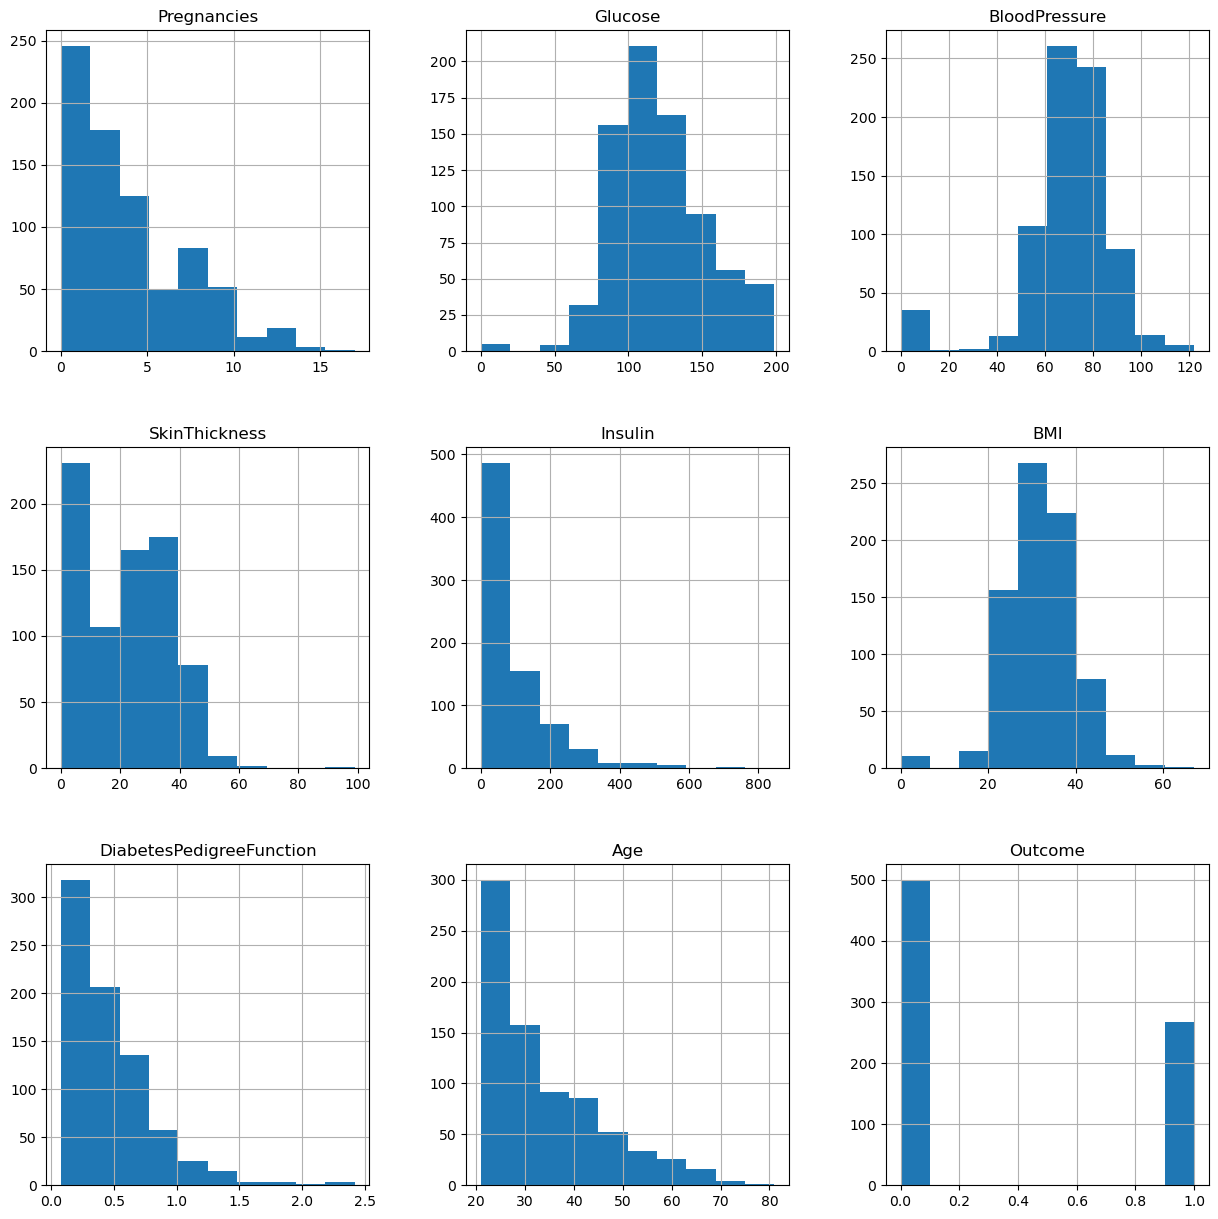

In [ ]:
# Plotting the data distribution plots before removing null values 
df.hist(figsize = (15,15))

Above we can see the distribution of each features using the hist plot.This helps us to analyze the dataset,as this shows every occurence in graphical structure, we can know the range of the data. 

In [ ]:
# Now we will be imputing the mean value of the column to each missing value of that particular column
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

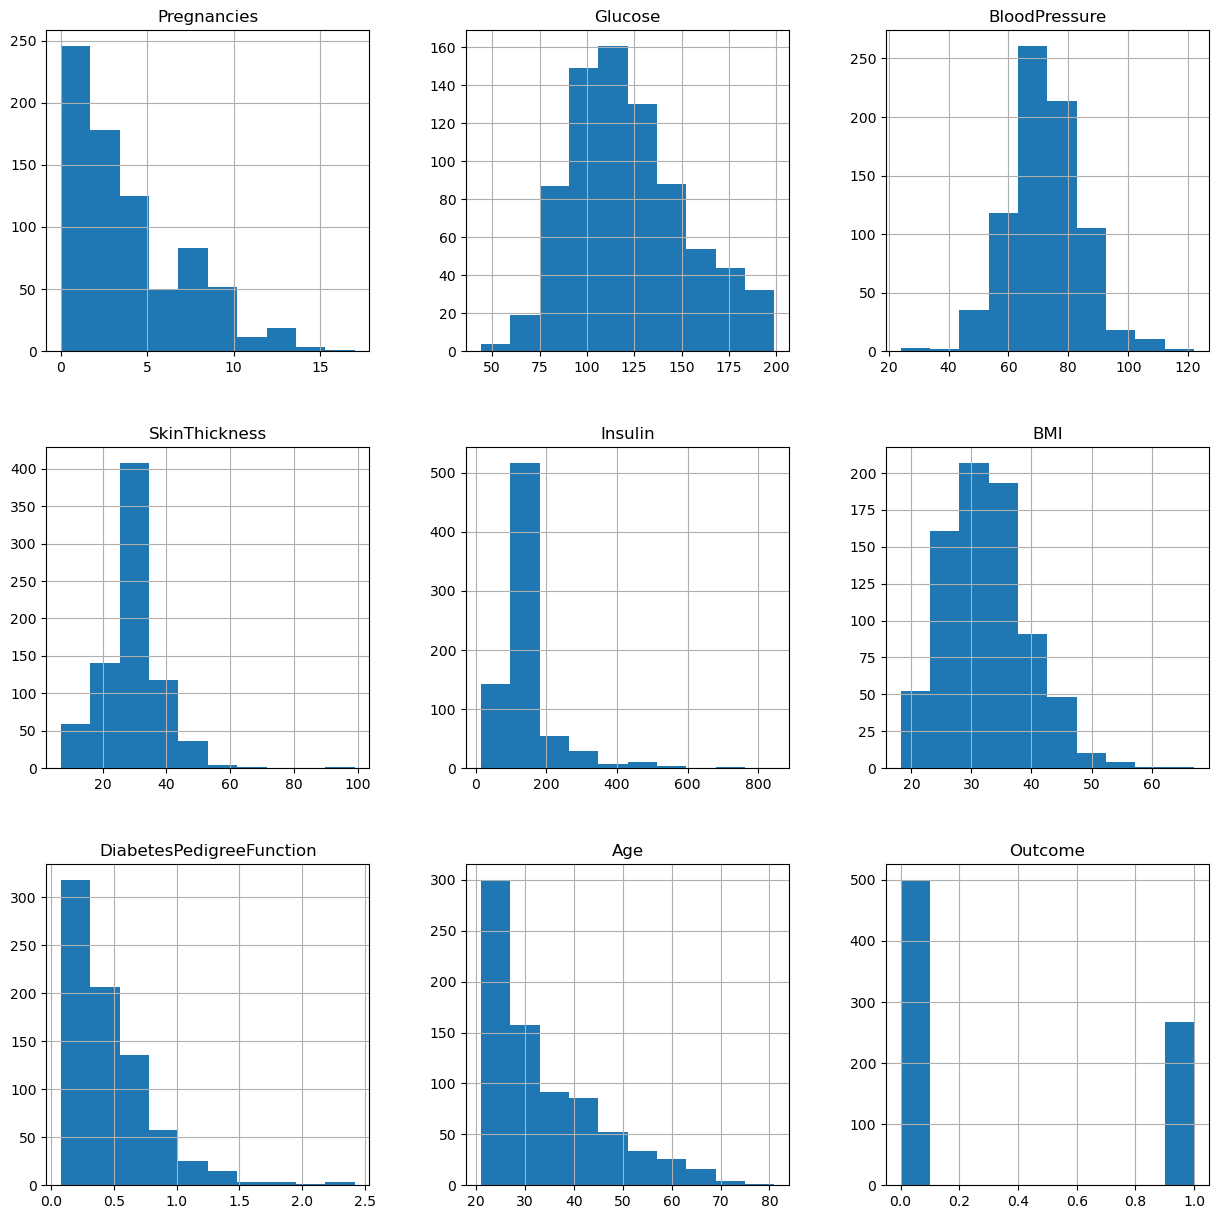

In [ ]:
df_copy.hist(figsize=(15,15))

Here we can see the changes after the null values are removed from dataset.

In [ ]:
X1=df_copy.drop('Outcome',axis=1).values   #Independent features
y1=df_copy.Outcome  #Dependent features


### Scaling the data

In [ ]:
x_sc= StandardScaler()
X1 =  pd.DataFrame(x_sc.fit_transform(X1))
X1.head()



,0,1,2,3,4,5,6,7
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


Now we can see that every value is scaled down on the same scale which will help our ML model to give better results

In [ ]:
y1

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Model Building

Splitting the dataset

In [ ]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)


In [ ]:
# Checking how many missing values in each column.
print("Total number of rows: {0}", format(len(df)))
print("Number of rows missing Pregnancies: {0}",
      format(len(df.loc[df['Pregnancies']==0])))
print("Number of rows missing Glucose: {0}"
      , format(len(df.loc[df['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}",
      format(len(df.loc[df['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}",
      format(len(df.loc[df['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}",
      format(len(df.loc[df['Insulin']==0])))
print("Number of rows missing BMI: {0}",
      format(len(df.loc[df['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}",
      format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}", format(len(df.loc[df['Age']==0])))



Total number of rows: {0} 768
Number of rows missing Pregnancies: {0} 111
Number of rows missing Glucose: {0} 5
Number of rows missing BloodPressure: {0} 35
Number of rows missing SkinThickness: {0} 227
Number of rows missing Insulin: {0} 374
Number of rows missing BMI: {0} 11
Number of rows missing DiabetesPedigreeFunction: {0} 0
Number of rows missing Age: {0} 0


In [ ]:
#Imputing zeros values in the dataset

from sklearn.impute import SimpleImputer


fill_value = SimpleImputer(missing_values=0, strategy='mean')
X1_train = fill_value.fit_transform(X1_train)
X1_test = fill_value.fit_transform(X1_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score




In [ ]:
# Building the model using RandomForest on training data
model1 = RandomForestClassifier(n_estimators=200)
model1.fit(X1_train, y1_train)


RandomForestClassifier(n_estimators=200)

In [ ]:
predictions_1=model1.predict(X1_test)

In [ ]:
score1=accuracy_score(y1_test,predictions_1)
score1

0.7467532467532467

Accuracy score of RandomForest model is 0.74

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_1))
print(classification_report(y1_test,predictions_1))

[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [ ]:
predictions_2=model2.predict(X1_test)

In [ ]:

score2=accuracy_score(y1_test,predictions_2)
score2

0.7077922077922078

Accuracy score of DecisionTree is 0.70

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions_2))
print(classification_report(y1_test,predictions_2))

[[77 22]
 [23 32]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.77        99
           1       0.59      0.58      0.59        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



Building Artificial Neural Network Model

In [ ]:
# Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
X=df.drop('Outcome',axis=1).values   #independent features
y=df['Outcome'].values  #dependent features

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Creating Tensors
X_train=torch.FloatTensor(X_train) # converting Independent features into float
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train) # Dependent features do not require to be floating value. 
y_test=torch.LongTensor(y_test)


In [ ]:
X_train

tensor([[  2.0000,  84.0000,   0.0000,  ...,   0.0000,   0.3040,  21.0000],
        [  9.0000, 112.0000,  82.0000,  ...,  28.2000,   1.2820,  50.0000],
        [  1.0000, 139.0000,  46.0000,  ...,  28.7000,   0.6540,  22.0000],
        ...,
        [ 10.0000, 101.0000,  86.0000,  ...,  45.6000,   1.1360,  38.0000],
        [  0.0000, 141.0000,   0.0000,  ...,  42.4000,   0.2050,  29.0000],
        [  0.0000, 125.0000,  96.0000,  ...,  22.5000,   0.2620,  21.0000]])

In [ ]:
# Creating Model

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() # inheriting parent class nn.module
        self.f_connected1=nn.Linear(input_features,hidden1) #Fully connected hidden layer 1
        self.f_connected2=nn.Linear(hidden1,hidden2) #Fully connected hidden layer 2
        self.out=nn.Linear(hidden2,out_features) # outcome layer
    def forward(self,x):  # Forward Propagation
        x=F.relu(self.f_connected1(x)) # applying Relu activation function
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x


Forward Propagation tracks the gradient descent and all backward propagation.Applying Relu activation function to Fully connected layer 1 and Fully connected layer 2.

In [ ]:
# Inside init function we require Input Layers,multiple hidden layers  and output layers.

In [ ]:
#instantiating ANN_model
torch.manual_seed(20) # initial weights 
model=ANN_Model()


In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In Backward Propagation we need to define loss function and the optimizer.We are using optimizers because to reduce the error between actual and predicted values of loss function.

In [ ]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


Multi-class-classification we are using CrossEntropyloss() to measure how well our model performs.The main goal is to get our model close to 0 as possible.

In [ ]:
epochs=500
final_losses=[] # storing all losses values
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:    # for every 10 epochs we are printing the loss
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad() # to reduce the loss value we are using zero_grad.It clears the gardients of all optimized class. 
    loss.backward() # Back propagate to find the derivate which we see in the previous class
    optimizer.step() 


Epoch number: 1 and the loss : 3.436734199523926
Epoch number: 11 and the loss : 0.7937090396881104
Epoch number: 21 and the loss : 0.600810170173645
Epoch number: 31 and the loss : 0.5868991017341614
Epoch number: 41 and the loss : 0.5716009140014648
Epoch number: 51 and the loss : 0.5585745573043823
Epoch number: 61 and the loss : 0.5484763383865356
Epoch number: 71 and the loss : 0.5397630333900452
Epoch number: 81 and the loss : 0.5324784517288208
Epoch number: 91 and the loss : 0.5249089598655701
Epoch number: 101 and the loss : 0.518044114112854
Epoch number: 111 and the loss : 0.5113544464111328
Epoch number: 121 and the loss : 0.5039476752281189
Epoch number: 131 and the loss : 0.49674227833747864
Epoch number: 141 and the loss : 0.48729294538497925
Epoch number: 151 and the loss : 0.4809300899505615
Epoch number: 161 and the loss : 0.47318822145462036
Epoch number: 171 and the loss : 0.4668591022491455
Epoch number: 181 and the loss : 0.46090608835220337
Epoch number: 191 and 

In [ ]:
# Prediction In X_test data
predictions=[]
with torch.no_grad():#while evaluating the results we do not require gardients.
    for i,data in enumerate(X_test): #enumerate will help to iterate the values in X_test data
        y_pred=model(data)
        predictions.append(y_pred.argmax().item()) 
        print(y_pred.argmax().item()) # argmax() gives the maximum value from y_pred either 0 or 1


1
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0


In [ ]:
# Comparing the X_test and y_test using confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm


array([[85, 14],
       [24, 31]])

85 and 31 are right results and 24 and 14 are our wrong results.

Text(95.72222222222221, 0.5, 'Predicted Values')

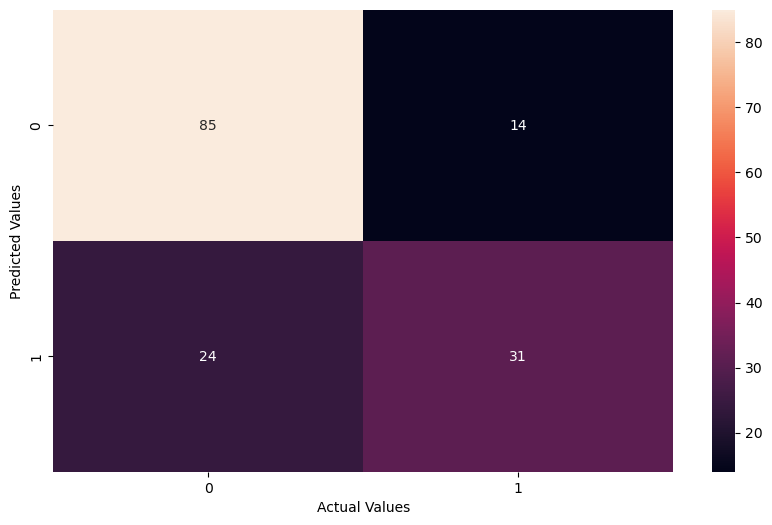

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')


In [ ]:
#85- true positive 
#31 -true negative
#14-false positive
#24-false negative

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7532467532467533

Accuracy score for ANN is 0.75

With the 4th patients data we are finding the whether our ANN model prediction is correct.

In [ ]:
list1=[0,137,40,35,168,43.1,2.228,33] #4th patient data
new_data1=torch.tensor(list1)

In [ ]:
with torch.no_grad():
    print(model(new_data1))
    print(model(new_data1).argmax().item())

tensor([-0.6495,  0.4802])
1


Predicted value is 1 means the patient is diabetic. if we check the dataset then the output of our ANN model prediction is correct.

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
list2=[10,101,76,48,180,32.9,0.171,63] #763 rd patient data
new_data2=torch.tensor(list2)

In [ ]:
with torch.no_grad():
    print(model(new_data2))
    print(model(new_data2).argmax().item())

tensor([ 4.5700, -8.4389])
0


Predicted value is 0 means the patient is not-diabetic. if we check the dataset then the output of our ANN model prediction is correct.

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Conclusion

Using these patient records we are able to build machine learning models to accurately predict whether our patients in dataset have diabetes or not.From the 3 algorithms used RandomForest accuracy score is 0.74 and decisiontree accuracy score is 0.70.For Artificial Neural Network Model the accuracy score is 0.75, i.e ANN has higher accuracy score compared with the other two Machine Learning Models.So we later checked our Predicted values with the ANN model and compared it with the Actual outcomes of the dataset given.We compared for the 4th patient and 763rd patient data.Our predicted results got matched with actual Outputs.